In [29]:
import os
import torch
import requests
import numpy as np
import pandas as pd
from pathlib import Path
import multiprocessing as mp
from database import Database
import matplotlib.pyplot as plt
from logger import create_logger
import plotly.graph_objects as go

In [2]:
print(f"CUDA {'is' if torch.cuda.is_available() else 'is not'} available for GPU Machine Learning")

CUDA is available for GPU Machine Learning


In [3]:
def build_candlesticks(total_days: int = 3, debug: bool = False, cores: int = mp.cpu_count()):
    logger = create_logger(__name__, r'C:\Users\Amram\IMPORTANT\Projects\github_projects\CryptoTradingBot\crypto_trading_bot.py', 'Coinbase Pro - PostgreSQL ETL Pipeline')
    db = Database(debug=debug, logger=logger)
    ticker_dict = db.build_candlesticks(total_days=total_days, logger=logger, cores=cores)
    return ticker_dict

In [4]:
ticker_dict = build_candlesticks(debug=True)
ticker_dict

2024-05-14 02:46:12,915:INFO:__main__:DEBUG MODE
2024-05-14 02:46:13,769:INFO:__main__:CryptoJutsu Database Created
2024-05-14 02:46:13,989:INFO:__main__:Granted temporary permissions to postgres to drop schema public.
2024-05-14 02:46:14,595:INFO:__main__:Granted temporary permissions to postgres to drop schema Candlesticks.
2024-05-14 02:46:14,761:INFO:__main__:"Candlesticks" schema created
2024-05-14 02:46:14,960:INFO:__main__:public schema dropped successfully
2024-05-14 02:46:15,208:INFO:__main__:Table "Candlesticks"."BTC-USDT" successfully created
2024-05-14 02:46:45,960:INFO:__main__:3 Days of ['BTC-USDT'] took 30.74937105178833 seconds to upload to SQL


{'BTC-USDT': {'days': [],
  'data':               Time_Stamp       Date      Time      Open      High       Low  \
  0    2024-05-11 00:00:00 2024-05-11  00:00:00  60811.61  60812.08  60802.85   
  1    2024-05-11 00:02:00 2024-05-11  00:02:00  60807.22  60813.41  60807.22   
  2    2024-05-11 00:03:00 2024-05-11  00:03:00  60812.25  60831.36  60812.25   
  3    2024-05-11 00:04:00 2024-05-11  00:04:00  60829.68  60852.72  60829.68   
  4    2024-05-11 00:05:00 2024-05-11  00:05:00  60857.96  60866.11  60849.64   
  ...                  ...        ...       ...       ...       ...       ...   
  3125 2024-05-13 23:56:00 2024-05-13  23:56:00  62904.99  62912.45  62881.90   
  3126 2024-05-13 23:57:00 2024-05-13  23:57:00  62891.87  62923.16  62891.87   
  3127 2024-05-13 23:58:00 2024-05-13  23:58:00  62921.60  62921.60  62913.22   
  3128 2024-05-13 23:59:00 2024-05-13  23:59:00  62921.15  62945.60  62921.15   
  3129 2024-05-14 00:00:00 2024-05-14  00:00:00  62938.78  62959.18  62904.

In [5]:
historic_btc = pd.DataFrame(ticker_dict['BTC-USDT']['data'])
historic_btc

,Time_Stamp,Date,Time,Open,High,Low,Close,Volume
0,2024-05-11 00:00:00,2024-05-11,00:00:00,60811.61,60812.08,60802.85,60802.85,0.000076
1,2024-05-11 00:02:00,2024-05-11,00:02:00,60807.22,60813.41,60807.22,60812.63,0.010180
2,2024-05-11 00:03:00,2024-05-11,00:03:00,60812.25,60831.36,60812.25,60831.36,0.029161
3,2024-05-11 00:04:00,2024-05-11,00:04:00,60829.68,60852.72,60829.68,60850.61,0.000002
4,2024-05-11 00:05:00,2024-05-11,00:05:00,60857.96,60866.11,60849.64,60866.11,0.092167
...,...,...,...,...,...,...,...,...
3125,2024-05-13 23:56:00,2024-05-13,23:56:00,62904.99,62912.45,62881.90,62881.90,0.053562
3126,2024-05-13 23:57:00,2024-05-13,23:57:00,62891.87,62923.16,62891.87,62912.49,0.068793
3127,2024-05-13 23:58:00,2024-05-13,23:58:00,62921.60,62921.60,62913.22,62921.16,0.017641
3128,2024-05-13 23:59:00,2024-05-13,23:59:00,62921.15,62945.60,62921.15,62945.60,0.050012


In [11]:
historic_btc_2 = Database.speed_read('SELECT "Time_Stamp", "Date", "Time", "Open", "High", "Low", "Close", "Volume" FROM "Candlesticks"."BTC-USDT"')

C:\Python\Python3_11_7\Lib\site-packages\connectorx\__init__.py:369: FutureWarning: DatetimeArray.__init__ is deprecated and will be removed in a future version. Use pd.array instead.
  pd.core.arrays.DatetimeArray(block_data), placement=binfo.cids


In [21]:
from HistoricalData import HistoricalData
from LiveCryptoData import LiveCryptoData
live_btc = LiveCryptoData('BTC-USDT').return_data()
historic_btc_3 = HistoricalData(ticker='BTC-USDT', granularity=60, start_date='2024-01-01-00-00', end_date='2024-01-04-00-00', verbose=True).retrieve_data()

Checking inputs...
Checking if user supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API.
Ticker 'BTC-USDT' found at the CoinBase Pro API, continuing to extraction.
Status Code: 200, successful API call.
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USDT' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2024-01-01T00:00:00
Provisional End: 2024-01-01T05:00:00
Data for chunk 1 of 15 extracted
Provisional Start: 2024-01-01T05:00:00
Provisional End: 2024-01-01T10:00:00
Data for chunk 2 of 15 extracted
Provisional Start: 2024-01-01T10:00:00
Provisional End: 2024-01-01T15:00:00
Data for chunk 3 of 15 extracted
Provisional Start: 2024-01-01T15:00:00
Provisional End: 2024-01-01T20:00:00
Data for chunk 4 of 15 extracted
Provisional Start: 2024-01-01T20:00:00
Provisional End: 2024-01-02T01:00:00
Data for 

In [26]:
historic_btc

,Time_Stamp,Date,Time,Open,High,Low,Close,Volume
0,2024-05-11 00:00:00,2024-05-11,00:00:00,60811.61,60812.08,60802.85,60802.85,0.000076
1,2024-05-11 00:02:00,2024-05-11,00:02:00,60807.22,60813.41,60807.22,60812.63,0.010180
2,2024-05-11 00:03:00,2024-05-11,00:03:00,60812.25,60831.36,60812.25,60831.36,0.029161
3,2024-05-11 00:04:00,2024-05-11,00:04:00,60829.68,60852.72,60829.68,60850.61,0.000002
4,2024-05-11 00:05:00,2024-05-11,00:05:00,60857.96,60866.11,60849.64,60866.11,0.092167
...,...,...,...,...,...,...,...,...
3125,2024-05-13 23:56:00,2024-05-13,23:56:00,62904.99,62912.45,62881.90,62881.90,0.053562
3126,2024-05-13 23:57:00,2024-05-13,23:57:00,62891.87,62923.16,62891.87,62912.49,0.068793
3127,2024-05-13 23:58:00,2024-05-13,23:58:00,62921.60,62921.60,62913.22,62921.16,0.017641
3128,2024-05-13 23:59:00,2024-05-13,23:59:00,62921.15,62945.60,62921.15,62945.60,0.050012


In [40]:
def create_candlestick_chart(df):
    # Ensure the DataFrame has the required columns
    required_columns = ["Time_Stamp", "Date", "Time", "Open", "High", "Low", "Close", "Volume"]
    if not all(column in df.columns for column in required_columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")
    
    # Create the candlestick figure
    fig = go.Figure()

    # Add candlestick trace
    fig.add_trace(go.Candlestick(
        x=df['Time_Stamp'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlesticks'
    ))

    # Add volume bars with full opacity and secondary y-axis
    fig.add_trace(go.Bar(
        x=df['Time_Stamp'],
        y=df['Volume'],
        name='Volume',
        marker=dict(
            color=['green' if open_ < close_ else 'red' for open_, close_ in zip(df['Open'], df['Close'])],
            line=dict(width=0)  # Remove borders for a cleaner look
        ),
        yaxis='y2',
        opacity=1.0,  # Ensure full opacity
        showlegend=False
    ))

    # Set up layout
    fig.update_layout(
        title='Candlestick Chart with Volume',
        xaxis_title='Time',
        yaxis_title='Price',
        yaxis2=dict(
            title='Volume',
            overlaying='y',
            side='right',
            showgrid=False,
            position=0.95,  # Adjust the position to make volume bars more prominent
            anchor='x',
            titlefont=dict(color='blue'),  # Change title font color for clarity
            tickfont=dict(color='blue'),  # Change tick font color for clarity
        ),
        xaxis_rangeslider_visible=False,
        hovermode='x unified',
        legend=dict(x=0.01, y=0.99),
        margin=dict(l=40, r=40, t=40, b=40)
    )

    # Customize hover labels for both traces
    fig.update_traces(hoverinfo='x+y+text')

    # Show the figure
    fig.show()

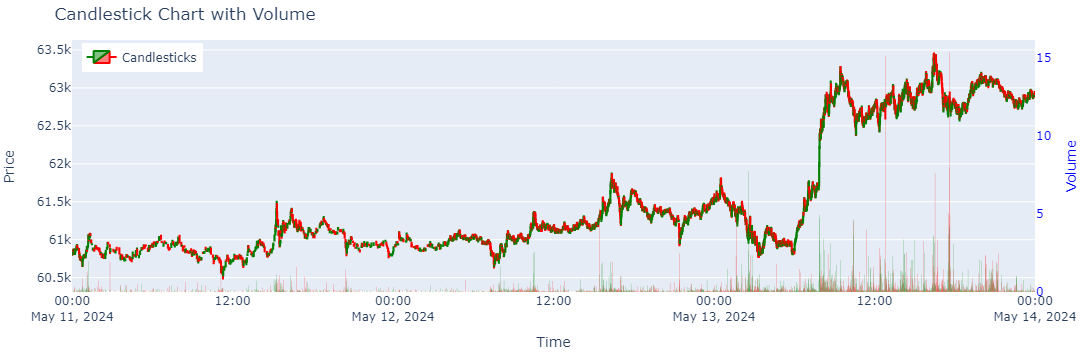

In [41]:
create_candlestick_chart(historic_btc)

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the Keras libraries and packages
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
pip install keras

In [ ]:
training_set = df.iloc[:round(.7*(len(df))),:]
training_set = training_set.iloc[:, 1:2].values

testing_set = df.iloc[round(.7*(len(df))):,:]
testing_set = testing_set.iloc[:, 1:2].values

len(testing_set)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(600, len(training_set)):
    X_train.append(training_set_scaled[i-600:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units=1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                                             patience=3)

In [ ]:
# Fitting the RNN to the Training set    
regressor.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[full_model_early_stopping])

In [ ]:
import pickle
from joblib import dump, load

In [ ]:
dump(regressor, 'model1.pkl')

In [ ]:
model = load('mlbrain.joblib')

In [ ]:
dataset_test = pd.DataFrame(testing_set)
real_stock_price = dataset_test.iloc[:20, 1:2].values

In [ ]:
dataset_total = pd.concat((df.loc[:round(.7*(len(df))),'open'], dataset_test), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
testing_set.shape

In [ ]:
X_test = []
testing_set_scaled = sc.fit_transform(df.iloc[:, 1:2].values)
for i in range(600,len(df)):
    X_test.append(testing_set_scaled[i-69:i, 0])
    
X_test = np.array(X_test)

print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_coin_price = sc.inverse_transform(predicted_stock_price)
predicted_coin_price

In [ ]:
# Visualising the results
plt.plot(testing_set, color='red', label='Real Near Price')
plt.plot(predicted_coin_price, color='blue', label='Predicted Near Stock Price')
plt.title('Near Price Prediction')
plt.xlabel('Time')
plt.ylabel('Near Stock Price')
plt.legend()
plt.show()

In [ ]:
df.head()